I chose Resnet50 because it genrally performs well in image classification
Other model that can be chosen is VGG16

# Importing libraries

In [37]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import keras
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [61]:
# re-size all the images to this(Resnet requirements in general)
IMAGE_SIZE = [224, 224]

train_path = 'dataset/trainset'
valid_path = 'dataset/testset'

In [62]:
ResNet50?
# include top to connect fully connected layer at top or not 
# not required as we have a small dataset

In [63]:
# Adding preprocessing layer using imagenet weights
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False) #3 for RGB #Resnet 50 is trained on imagenet

In [64]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [65]:
resnet.layers

# Fine-tuing ResNet model

In [66]:
# no need to train extra weights using already trained by resnet
for layer in resnet.layers:
    layer.trainable = False

In [67]:
folders = glob('dataset/trainset/*')
folders

['dataset/trainset\\audi',
 'dataset/trainset\\bmw',
 'dataset/trainset\\ferrari',
 'dataset/trainset\\lamborghini',
 'dataset/trainset\\mercedes',
 'dataset/trainset\\tesla']

In [68]:
#  flatten the output from resnet layer
resnet.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [69]:
res = resnet.output
#res = AveragePooling2D(pool_size = (7, 7))(res)
res = Flatten(name = "flatten")(res)
res = Dense(len(folders), activation='softmax')(res)
model = Model(inputs = resnet.input, outputs = res)

In [70]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [71]:
# tell the model what cost and optimization method to use
model.compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = ['accuracy']
)

# Data augomentation

In [72]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) 
# divide all pixel values by 255
# test data never do data augomentation

In [73]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('dataset/trainset',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 384 images belonging to 6 classes.


In [74]:
test_set = test_datagen.flow_from_directory('dataset/testset',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 96 images belonging to 6 classes.


# Train model

In [75]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
12/12 [==============================] - 47s 4s/step - loss: 9.2041 - accuracy: 0.1458 - val_loss: 6.7419 - val_accuracy: 0.1667
Epoch 2/50
12/12 [==============================] - 44s 4s/step - loss: 5.8869 - accuracy: 0.1849 - val_loss: 5.5819 - val_accuracy: 0.1979
Epoch 3/50
12/12 [==============================] - 44s 4s/step - loss: 3.4737 - accuracy: 0.2266 - val_loss: 3.5849 - val_accuracy: 0.1875
Epoch 4/50
12/12 [==============================] - 53s 5s/step - loss: 2.2066 - accuracy: 0.2500 - val_loss: 2.1448 - val_accuracy: 0.2604
Epoch 5/50
12/12 [==============================] - 65s 6s/step - loss: 1.9178 - accuracy: 0.2708 - val_loss: 2.2264 - val_accuracy: 0.1979
Epoch 6/50
12/12 [==============================] - 57s 5s/step - loss: 2.0144 - accuracy: 0.3073 - val_loss: 2.3769 - val_accuracy: 0.1354
Epoch 7/50
12/12 [==============================] - 55s 5s/step - loss: 1.7891 - accuracy: 0.3125 - val_loss: 2.1119 - val_accuracy: 0.2396
Epoch 8/50
12/12 [==

# Visualization

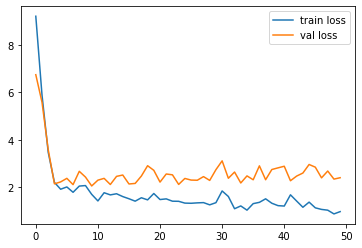

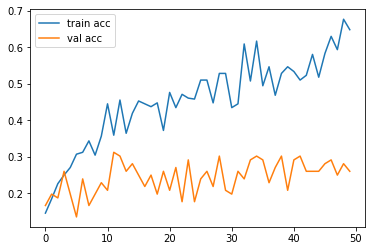

<Figure size 432x288 with 0 Axes>

In [76]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [77]:
model.save('model_resnet50.h5')

c:\users\ameya gupta\miniconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [78]:
import numpy as np
y_pred = np.argmax(model.predict(test_set), axis=1)
y_pred

array([4, 3, 3, 4, 5, 0, 4, 1, 1, 1, 5, 4, 4, 0, 4, 3, 3, 4, 3, 4, 4, 4,
       3, 5, 4, 0, 1, 0, 4, 0, 1, 4, 5, 3, 5, 0, 4, 0, 4, 4, 5, 5, 4, 0,
       4, 0, 0, 5, 0, 3, 4, 3, 4, 0, 5, 4, 5, 5, 4, 4, 4, 3, 3, 3, 4, 0,
       4, 4, 3, 4, 3, 3, 4, 3, 0, 3, 4, 4, 4, 3, 2, 5, 4, 4, 3, 5, 1, 5,
       4, 2, 3, 4, 4, 3, 5, 4], dtype=int64)